In [25]:
import numpy as np
import pandas as pd

from sklearn.metrics import roc_auc_score

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [70]:
# Load Training Data
training_data = np.load("Train_Set.npy")
dev_data = np.load("Dev_Set.npy")

# Separate data into features and labels
num_feats = training_data.shape[1]
training_feats = training_data[:, 0:num_feats-1]
training_labels = training_data[:, num_feats-1]
dev_feats = dev_data[:, 0:num_feats-1]
dev_labels = dev_data[:, num_feats-1]

# Explore data
labels = np.append(training_labels, dev_labels)
print (labels == 0).sum(), 'positive examples'
print (labels == 1).sum(), 'negative examples'

# Scale features
scaler = StandardScaler()
scaler.fit(training_feats)
training_feats = scaler.transform(training_feats)
dev_feats = scaler.transform(dev_feats)
                    
print training_data.shape

65683 positive examples
2735 negative examples
(60816, 371)


In [56]:
# Run logistic regression
log_reg = LogisticRegression().fit(training_feats, training_labels)

lg_train_pred = log_reg.predict_proba(training_feats)[:,1]
lg_dev_pred = log_reg.predict_proba(dev_feats)[:,1]

print 'Overall AUC Train:', roc_auc_score(training_labels, lg_train_pred)
print 'Overall AUC Dev:', roc_auc_score(dev_labels, lg_dev_pred)

Overall AUC Train: 0.805023887004
Overall AUC Dev: 0.786103780924


In [57]:
# Run basic MLP using sklearn default values
mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu')

mlp.fit(training_feats, training_labels)
mlp_train_pred = mlp.predict_proba(training_feats)[:,1]
mlp_dev_pred = mlp.predict_proba(dev_feats)[:,1]

print 'Overall AUC Train:', roc_auc_score(training_labels, mlp_train_pred)
print 'Overall AUC Dev:', roc_auc_score(dev_labels, mlp_dev_pred)

Overall AUC Train: 0.890312069034
Overall AUC Dev: 0.790367211653


In [55]:
mlp_dev_pred[:,1].mean()

0.038714588507359017


learning on dataset Traditional loss with various architectures
training: constant learning-rate
training: constant with momentum
training: constant with Nesterov's momentum
training: inv-scaling learning-rate
training: inv-scaling with momentum
training: inv-scaling with Nesterov's momentum
training: adam


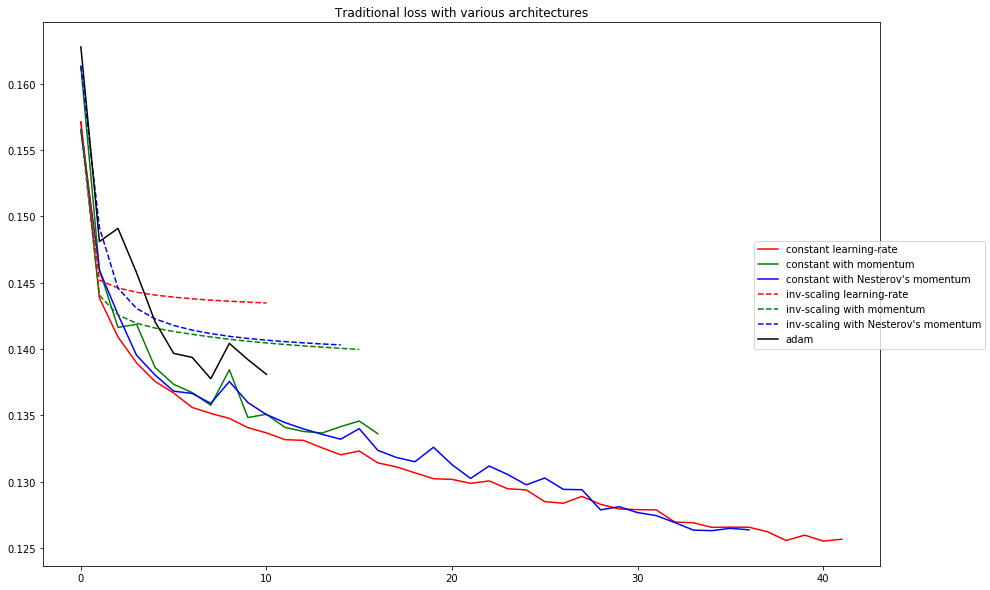

In [69]:
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets

# different learning rate schedules and momentum parameters
params = [{'solver': 'sgd', 'learning_rate': 'constant', 'momentum': 0,
           'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9,
           'nesterovs_momentum': False, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9,
           'nesterovs_momentum': True, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': 0,
           'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': .9,
           'nesterovs_momentum': True, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': .9,
           'nesterovs_momentum': False, 'learning_rate_init': 0.2},
          {'solver': 'adam', 'learning_rate_init': 0.01}]

labels = ["constant learning-rate", "constant with momentum",
          "constant with Nesterov's momentum",
          "inv-scaling learning-rate", "inv-scaling with momentum",
          "inv-scaling with Nesterov's momentum", "adam"]

plot_args = [{'c': 'red', 'linestyle': '-'},
             {'c': 'green', 'linestyle': '-'},
             {'c': 'blue', 'linestyle': '-'},
             {'c': 'red', 'linestyle': '--'},
             {'c': 'green', 'linestyle': '--'},
             {'c': 'blue', 'linestyle': '--'},
             {'c': 'black', 'linestyle': '-'}]


def plot_on_dataset(X, y, ax, name):
    # for each dataset, plot learning for each learning strategy
    print("\nlearning on dataset %s" % name)
    ax.set_title(name)
    mlps = []

    max_iter = 400

    for label, param in zip(labels, params):
        print("training: %s" % label)
        mlp = MLPClassifier(verbose=0, random_state=0,
                            max_iter=max_iter, **param)
        mlp.fit(X, y)
        mlps.append(mlp)
#         print("Training set score: %f" % mlp.score(X, y))
#         print("Training set loss: %f" % mlp.loss_)
    for mlp, label, args in zip(mlps, labels, plot_args):
            ax.plot(mlp.loss_curve_, label=label, **args)


fig, axes = plt.subplots(1, 1, figsize=(15, 10))


data_sets = [(training_feats, training_labels)]

plot_on_dataset(training_feats, training_labels, axes, 'Traditional loss with various architectures')

fig.legend(axes.get_lines(), labels, ncol=1, loc="center right")
plt.show()